<a href="https://colab.research.google.com/github/BorysZhyhalo/DataScience_RobotDreams/blob/main/Lesson13_Boostings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def get_report(model, X_test, y_true):
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

# Dataset

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
**Гіперпараметри**:

- *base_estimators:* базовий естіматор - алгоритм, який буде використовуватись в якості weak learner. За замовчуванням = DecisionTreeClassifier(max_depth = 1) - decision stump.
- *n_estimators:* максимальна кількість естіматорів. По замовчуванню = 50
- *learning_rate:* швидкість навчання, зменшує/збільшує внесок кожного наступного естіматора. За замовчуванням = 1.
- *loss*: використовується лише для регресора. Функція втрат використовується для оновлення ваг після кожної інтерації бустінга {‘Linear’, ‘square’, ‘exponential’}, за замовчуванням = ’linear’

In [ ]:
RANDOM_STATE = 42

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=RANDOM_STATE)
model = ada_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9286    1.0000    0.9630        13
           2     1.0000    0.9000    0.9474        10

    accuracy                         0.9737        38
   macro avg     0.9762    0.9667    0.9701        38
weighted avg     0.9756    0.9737    0.9735        38



In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
ada_clf.feature_importances_

array([0.02, 0.  , 0.52, 0.46])

Спробуємо інші base learners.

In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=25,
    learning_rate=0.1,
    random_state=RANDOM_STATE)
ada_clf.fit(X_train, y_train)

get_report(ada_clf, X_train, y_train)
get_report(ada_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        35
           1     1.0000    1.0000    1.0000        37
           2     1.0000    1.0000    1.0000        40

    accuracy                         1.0000       112
   macro avg     1.0000    1.0000    1.0000       112
weighted avg     1.0000    1.0000    1.0000       112

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9286    1.0000    0.9630        13
           2     1.0000    0.9000    0.9474        10

    accuracy                         0.9737        38
   macro avg     0.9762    0.9667    0.9701        38
weighted avg     0.9756    0.9737    0.9735        38



In [ ]:
ada_clf.feature_importances_

array([0.07136797, 0.00747584, 0.34565489, 0.5755013 ])

[Support vector Machines](https://scikit-learn.org/stable/modules/svm.html)

Support Vector Machines
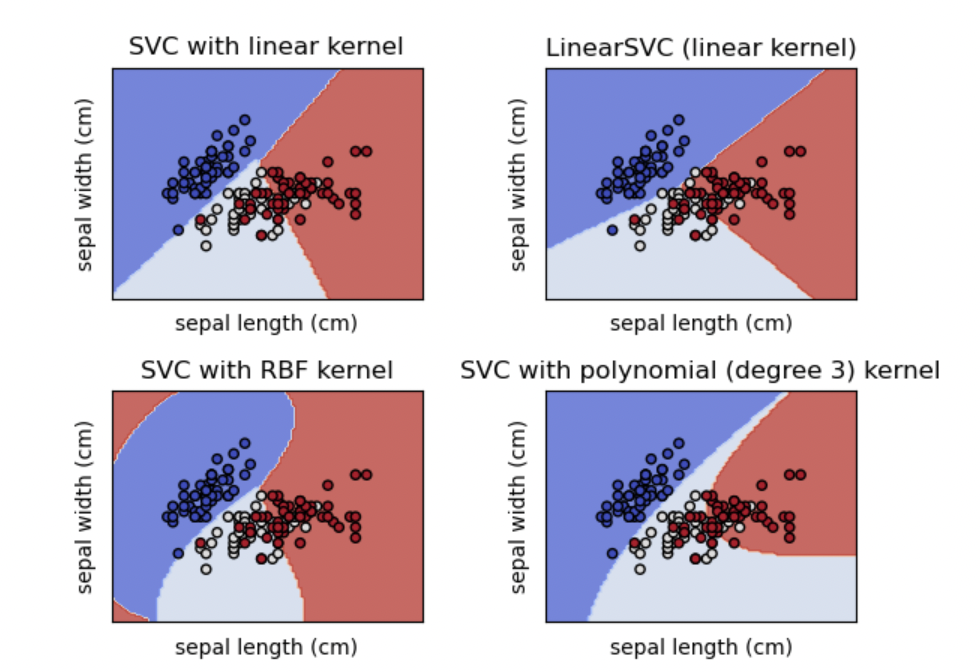

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True, kernel='linear')
ada_clf = AdaBoostClassifier(svc, n_estimators=50)
ada_clf.fit(X_train, y_train)

get_report(ada_clf, X_train, y_train)
get_report(ada_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        35
           1     0.9730    0.9730    0.9730        37
           2     0.9750    0.9750    0.9750        40

    accuracy                         0.9821       112
   macro avg     0.9827    0.9827    0.9827       112
weighted avg     0.9821    0.9821    0.9821       112

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     1.0000    1.0000    1.0000        13
           2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        38
   macro avg     1.0000    1.0000    1.0000        38
weighted avg     1.0000    1.0000    1.0000        38



# [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
Кожен наступний естіматор намагається зменшити похибку моделі, передбачаючи залишки

Гіперпараметри
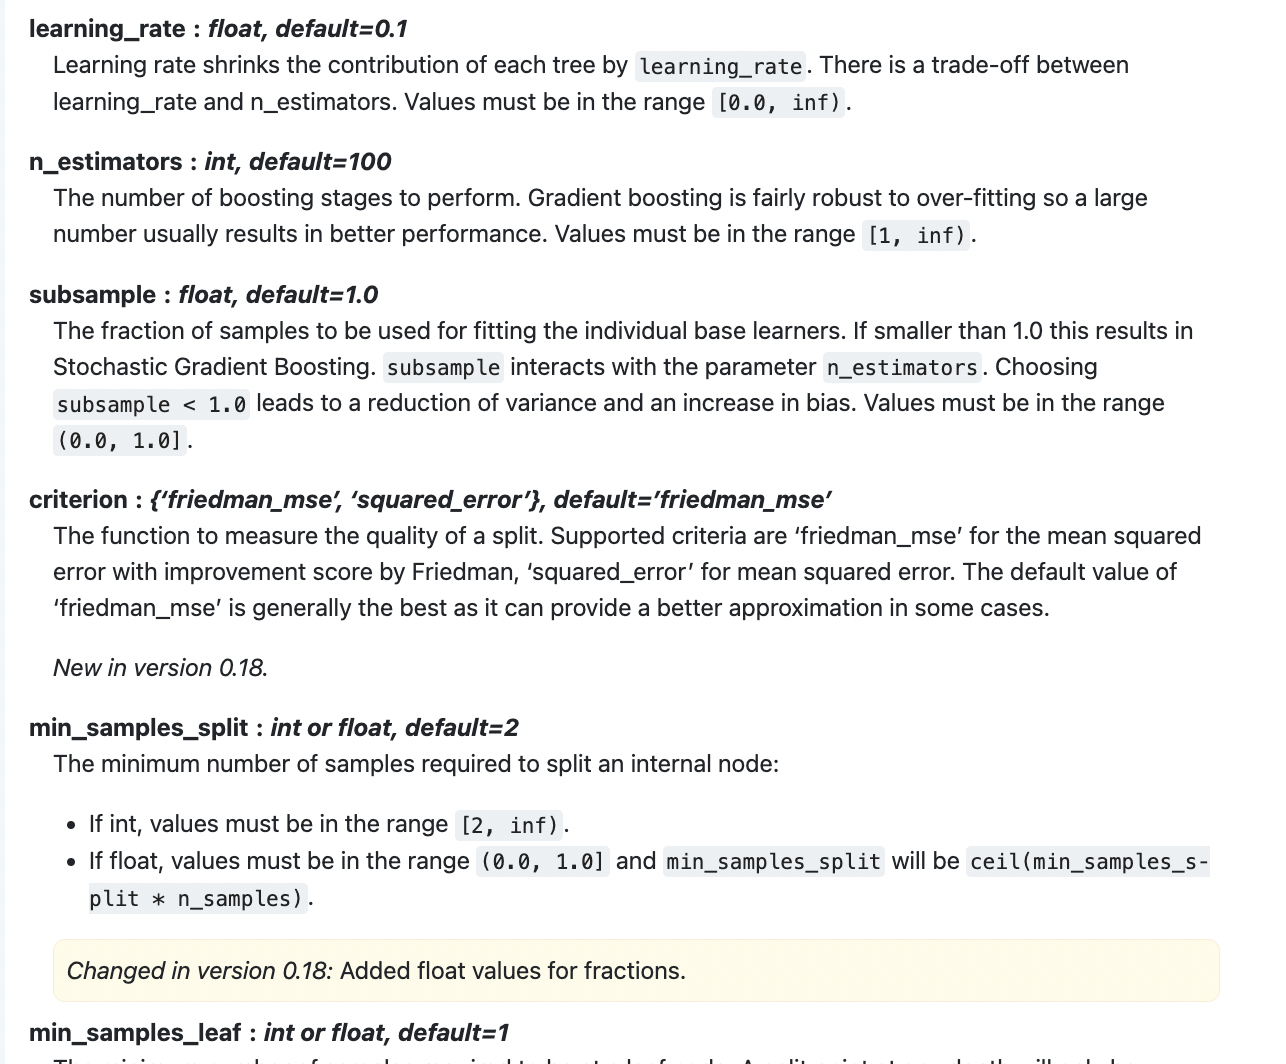

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(
    n_estimators=10,
    random_state=RANDOM_STATE)
gb_clf.fit(X_train, y_train)

get_report(gb_clf, X_train, y_train)
get_report(gb_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        35
           1     1.0000    0.9730    0.9863        37
           2     0.9756    1.0000    0.9877        40

    accuracy                         0.9911       112
   macro avg     0.9919    0.9910    0.9913       112
weighted avg     0.9913    0.9911    0.9911       112

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9286    1.0000    0.9630        13
           2     1.0000    0.9000    0.9474        10

    accuracy                         0.9737        38
   macro avg     0.9762    0.9667    0.9701        38
weighted avg     0.9756    0.9737    0.9735        38



# XGBoost

Рекомендований спосіб встановлення xgboost:

In [ ]:
!conda install -c conda-forge xgboost
!pip install xgboost

/bin/bash: line 1: conda: command not found


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier(max_depth=3,
                        n_estimators=10,
                        use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

get_report(xgb_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.9375    1.0000    0.9677        15
           1     0.9231    0.9231    0.9231        13
           2     1.0000    0.9000    0.9474        10

    accuracy                         0.9474        38
   macro avg     0.9535    0.9410    0.9461        38
weighted avg     0.9490    0.9474    0.9471        38

